In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [10]:
df = pd.read_csv('dataset.csv')

In [11]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9700 entries, 0 to 9699
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID_Pedido     9700 non-null   object 
 1   Data_Pedido   9700 non-null   object 
 2   ID_Cliente    9700 non-null   object 
 3   Segmento      9700 non-null   object 
 4   Pais          9700 non-null   object 
 5   Cidade        9700 non-null   object 
 6   Estado        9700 non-null   object 
 7   ID_Produto    9700 non-null   object 
 8   Categoria     9700 non-null   object 
 9   SubCategoria  9700 non-null   object 
 10  Valor_Venda   9700 non-null   float64
dtypes: float64(1), object(10)
memory usage: 833.7+ KB


In [13]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [14]:
df.dtypes

,0
ID_Pedido,object
Data_Pedido,object
ID_Cliente,object
Segmento,object
Pais,object
Cidade,object
Estado,object
ID_Produto,object
Categoria,object
SubCategoria,object


In [15]:
df['Valor_Venda'].describe()

,Valor_Venda
count,9700.000000
mean,230.469892
std,627.504252
min,0.444000
25%,17.248000
50%,54.272000
75%,209.932500
max,22638.480000


In [16]:
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


In [17]:
df.isnull().sum()

,0
ID_Pedido,0
Data_Pedido,0
ID_Cliente,0
Segmento,0
Pais,0
Cidade,0
Estado,0
ID_Produto,0
Categoria,0
SubCategoria,0


In [18]:
df['Categoria']

,Categoria
0,Furniture
1,Furniture
2,Office Supplies
3,Furniture
4,Office Supplies
...,...
9695,Office Supplies
9696,Office Supplies
9697,Technology
9698,Office Supplies


NOS EXERCICIOS ABAIXO, demonstrar o resultado atrasvés de codigo de barras

In [19]:
#Cidade com maior valor de venda de produtos da categoria 'office supplies'
cidades_vendas = df[df['Categoria'] == 'Office Supplies'].groupby('Cidade')['Valor_Venda'].sum()
cidade_maior_venda = cidades_vendas.idxmax()
print("a cidade com maior valor de venda para Office Supplies é ", cidade_maior_venda)

a cidade com maior valor de venda para Office Supplies é  New York City


In [33]:
#Total de vendas por data do pedido
vendas_por_data = df.groupby('Data_Pedido')['Valor_Venda'].sum()
vendas_por_data.head()

,Valor_Venda
Data_Pedido,
01/01/2018,1481.8280
01/02/2015,468.9000
01/02/2017,161.9700
01/03/2015,2203.1510
01/03/2016,1642.1744


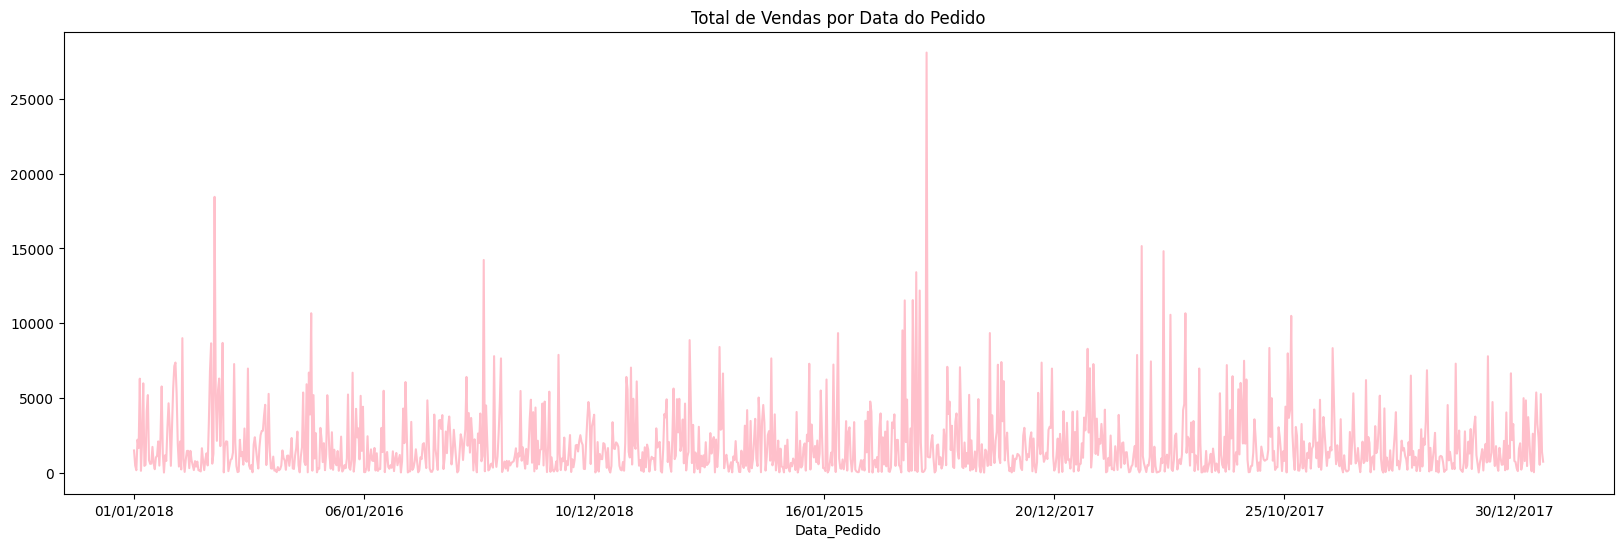

In [34]:
#plot
plt.figure(figsize = (20, 6))
vendas_por_data.plot(x = 'Data_Pedido', y = 'Valor_Venda', color = 'pink')
plt.title('Total de Vendas por Data do Pedido')
plt.show()

In [35]:
#Total de vendas por estado
vendas_por_estado = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

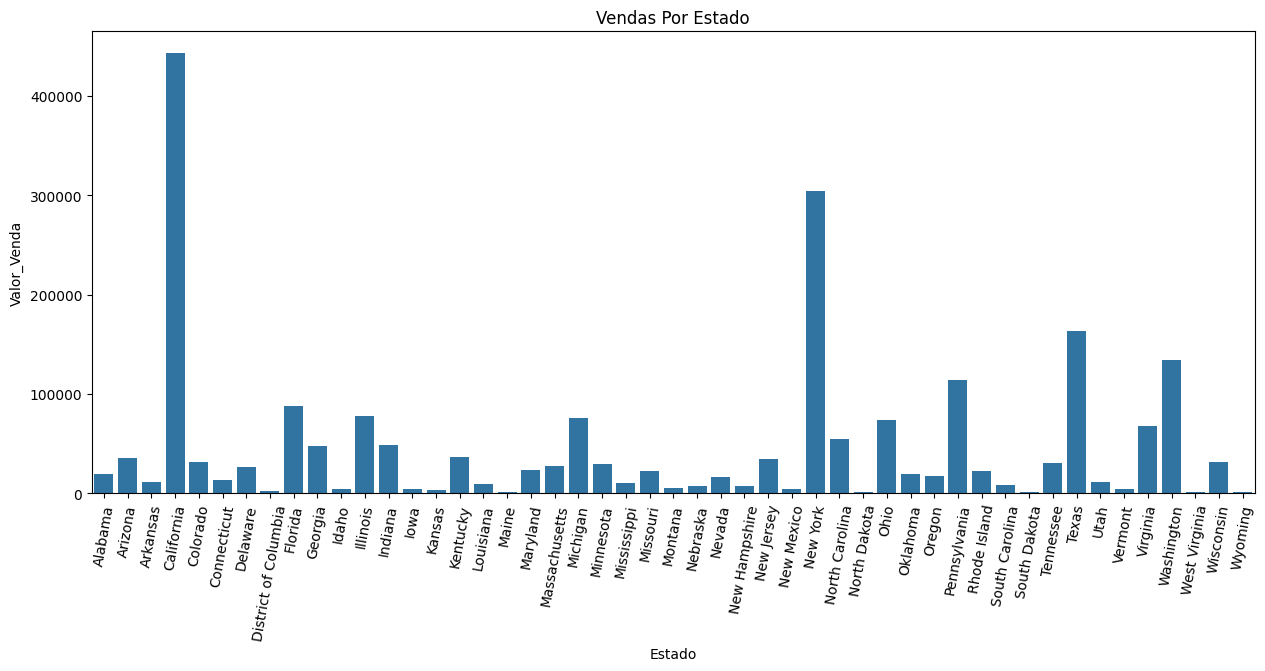

In [39]:
plt.figure(figsize = (15, 6))
sns.barplot(data = vendas_por_estado,
            y = "Valor_Venda",
            x = 'Estado').set(title = 'Vendas Por Estado')
plt.xticks(rotation = 80)
plt.show()

In [48]:
#quais sao as 10 cidades com maior total de vendas?
cidades_maiores_vendas = df.groupby('Cidade')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False).head(10)

In [49]:
cidades_maiores_vendas.head(10)

,Cidade,Valor_Venda
327,New York City,251749.2190
265,Los Angeles,171654.6330
450,Seattle,114725.4780
436,San Francisco,107489.9520
372,Philadelphia,107197.8030
207,Houston,61590.1868
435,San Diego,47458.3790
80,Chicago,46974.3430
216,Jacksonville,44713.1830
123,Detroit,42446.9440


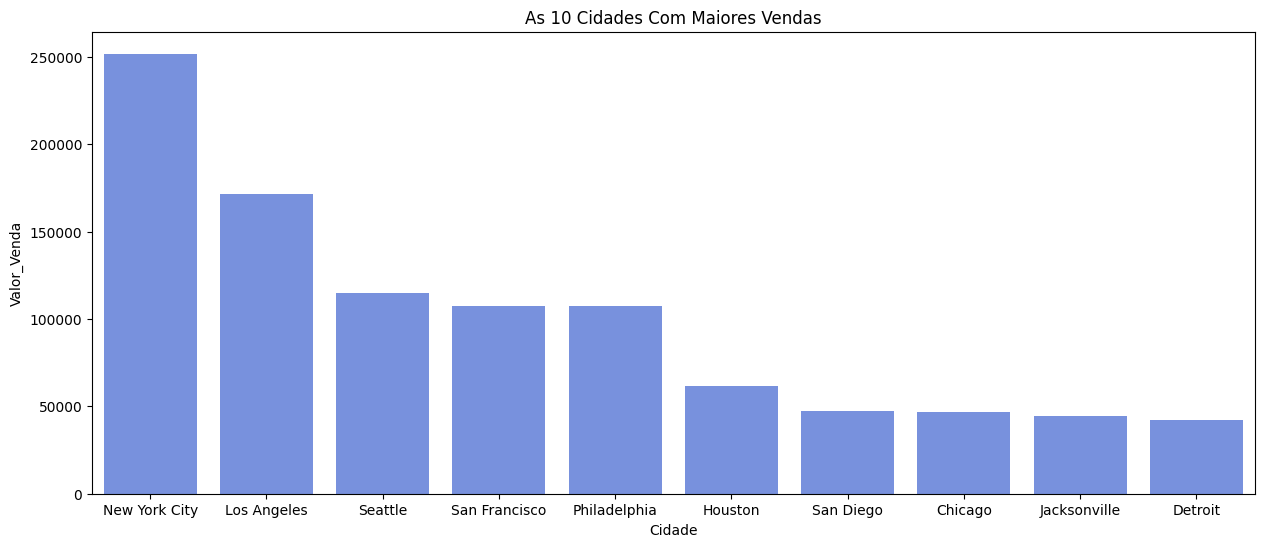

In [51]:
plt.figure(figsize = (15, 6))
sns.set_palette('coolwarm')
sns.barplot(data = cidades_maiores_vendas,
            y = "Valor_Venda",
            x = "Cidade",
            ).set(title = "As 10 Cidades Com Maiores Vendas")
plt.show()

In [52]:
#Segmento com maior total de vendas
segmentos_vendas = df[['Segmento', 'Valor_Venda']].groupby('Segmento')['Valor_Venda'].sum()
segmento_max = segmentos_vendas.idxmax()
print(segmento_max)

Consumer


In [61]:
segmentos = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending = False)
segmentos.head()

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [57]:
# criando a função para formatar os valores
def autopct_format(values):
  def my_format(pct):
    total = sum(values)
    val = int(round(pct + total / 100))
    return " $ {v:d}".format(v = val)
  return my_format


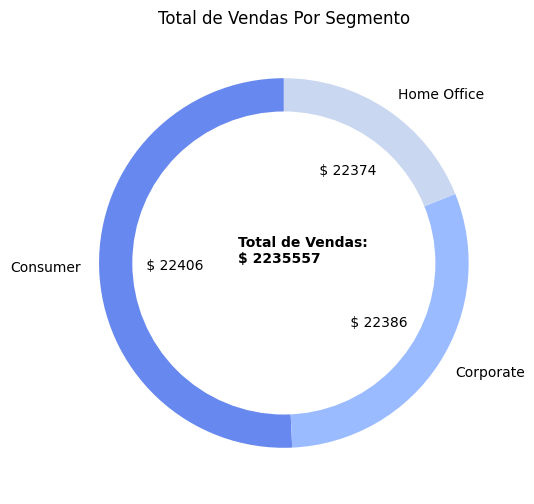

In [68]:
# Criando o gráfico

# Mais uma vez, ajustando o tamanho
plt.figure(figsize = (16, 6))

# Gráfico de pizza
plt.pie(segmentos['Valor_Venda'],
        labels = segmentos['Segmento'],
        autopct = autopct_format(segmentos['Valor_Venda']),
        startangle = 90)

# Deixa o círculo de dentro em branco
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas:\n' + '$ ' + str(int(sum(segmentos['Valor_Venda']))), xy = (-0.25, 0), fontweight='bold')
plt.title('Total de Vendas Por Segmento')
plt.show()

In [24]:
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [25]:
#Total de vendas por segmento & ano

In [26]:
df['Data_Pedido'].head()

,Data_Pedido
0,08/11/2017
1,08/11/2017
2,12/06/2017
3,11/10/2016
4,11/10/2016


In [70]:
#convertendo a coluna de datas para datetime
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

In [72]:
df['Ano'] = df['Data_Pedido'].dt.year
total_vendas = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()
print(total_vendas)

Ano   Segmento   
2015  Consumer       256719.9166
      Corporate      125819.5957
      Home Office     88229.0878
2016  Consumer       265295.2593
      Corporate      114643.1229
      Home Office     74134.1332
2017  Consumer       288459.5572
      Corporate      203266.7398
      Home Office    103639.6270
2018  Consumer       323359.6019
      Corporate      235502.7284
      Home Office    156488.5849
Name: Valor_Venda, dtype: float64


In [28]:
# os gestores da emrpsa querem conceder diferentes faixas de descontos e gostariam de fazer uma simulacao com base nas regras abaixo:
# se o Valor_Venda for maior que 1000 recebe 15% de desconto
# se o Valor_Venda for menos que 1000 recebe apenas 10% de desconto

In [74]:
df['Desconto'] = np.where(df['Valor_Venda'] > 1000, 0.15, 0.10)
df['Valor_Desconto'] = df['Valor_Venda'].apply(lambda x: x * 0.15 if x > 1000 else x * 0.10)
df['Valor_Final'] = df['Valor_Venda'] - df['Valor_Desconto']
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Valor_Desconto,Valor_Final,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,26.19600,235.76400,0.1
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,73.19400,658.74600,0.1
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,1.46200,13.15800,0.1
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,95.75775,861.81975,0.1
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,2.23680,20.13120,0.1


In [75]:
# Total de itens com 10 e 15% de desconto
df['Desconto'].value_counts()

,count
Desconto,
0.10,9243
0.15,457



 **Média do valor de venda antes e depois do desconto de 15% aplicado**

In [77]:
#filtrando as vendas antes do desconto
df_antes_do_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Venda']


In [79]:
#filtrando as vendas depois do desconto
df_depois_do_desconto = df.loc[df['Desconto'] == 0.15, 'Valor_Final']

In [83]:
#calculando as medias antes e dps do desconto
media_antes = df_antes_do_desconto.mean()
media_depois = df_depois_do_desconto.mean()
print("A média das vendas antes do desconto de 15% é, ", round(media_antes, 2), "e a média após o desconto aplicado é ", round(media_depois, 2))

A média das vendas antes do desconto de 15% é,  2116.81 e a média após o desconto aplicado é  1799.29


**Média de vendas por segmento, ano e mês**

In [93]:
df['Mes'] = df['Data_Pedido'].dt.month

In [94]:
df_agg = df.groupby(['Ano', 'Mes', 'Segmento'])['Valor_Venda'].agg(['sum','mean', 'median'])

In [98]:
df_agg

sum        mean  median
Ano  Mes Segmento                                   
2015 1   Consumer      6896.6290  146.736787  36.440
         Corporate     1701.5280  130.886769  51.940
         Home Office   5607.5500  329.855882  62.820
     2   Consumer      3167.8540  117.327926  22.776
         Corporate      623.1180   69.235333  62.310
...                          ...         ...     ...
2018 11  Corporate    44357.9862  341.215278  79.530
         Home Office  24009.3840  247.519423  56.560
     12  Consumer     48107.4558  183.616244  52.533
         Corporate    20524.4320  153.167403  46.460
         Home Office  13022.3910  224.523983  49.260

[144 rows x 3 columns]

In [96]:
anosN = df_agg.index.get_level_values(0)
mesesN = df_agg.index.get_level_values(1)
segmentosN = df_agg.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

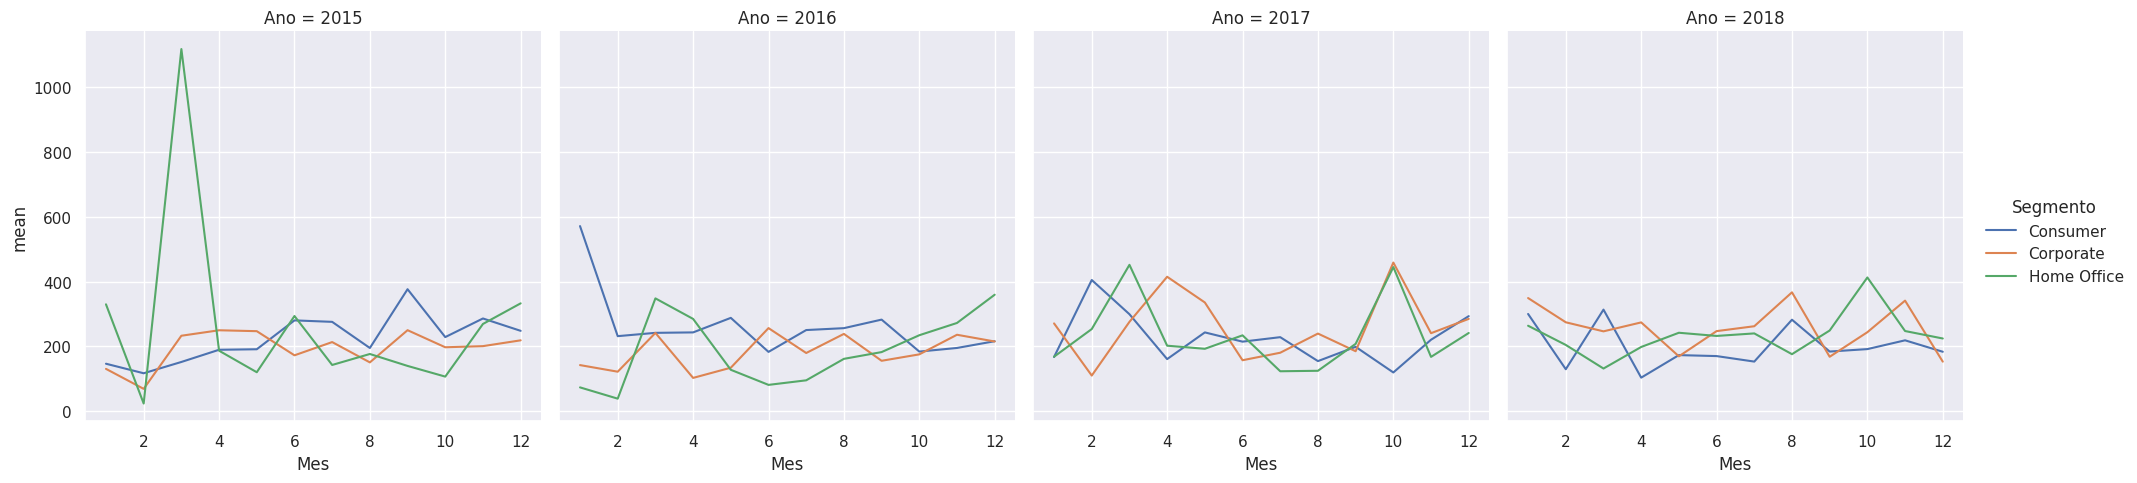

In [97]:
# Plot
plt.figure(figsize = (12, 6))
sns.set()
fig1 = sns.relplot(kind = 'line',
                   data = df_agg,
                   y = 'mean',
                   x = mesesN,
                   hue = segmentosN,
                   col = anosN,
                   col_wrap = 4)
plt.show()

**Total de Vendas por Categoria e Subcategoria (apenas as TOP 12)**

In [105]:
# Agrupando por categoria e subcategoria e calculando a soma somente em variáveis numéricas
df_cat_subcat = df.groupby(["Categoria", "SubCategoria"]).sum(numeric_only = True).sort_values('Valor_Venda', ascending = False).head(12)

In [108]:
# Convertemos a coluna Valor_Venda em número inteiro e classificamos por categoria
df_cat_subcat = df_cat_subcat[['Valor_Venda']].astype(int).sort_values(by = 'Categoria').reset_index()



In [109]:
df_cat_subcat

,Categoria,SubCategoria,Valor_Venda
0,Furniture,Chairs,317919
1,Furniture,Tables,202083
2,Furniture,Bookcases,108045
3,Furniture,Furnishings,88862
4,Office Supplies,Storage,216188
5,Office Supplies,Binders,194723
6,Office Supplies,Appliances,104061
7,Office Supplies,Paper,76312
8,Technology,Phones,325271
9,Technology,Machines,189238


In [110]:
df_cat = df_cat_subcat.groupby('Categoria').sum(numeric_only = True).reset_index()

In [112]:
df_cat

,Categoria,Valor_Venda
0,Furniture,716909
1,Office Supplies,591284
2,Technology,823548


# **Criando o gráfico**

In [113]:
cores_categorias = ['#5d00de',
                    '#0ee84f',
                    '#e80e27']

# Listas de cores para subcategorias
cores_subcategorias = ['#aa8cd4',
                       '#aa8cd5',
                       '#aa8cd6',
                       '#aa8cd7',
                       '#26c957',
                       '#26c958',
                       '#26c959',
                       '#26c960',
                       '#e65e65',
                       '#e65e66',
                       '#e65e67',
                       '#e65e68']

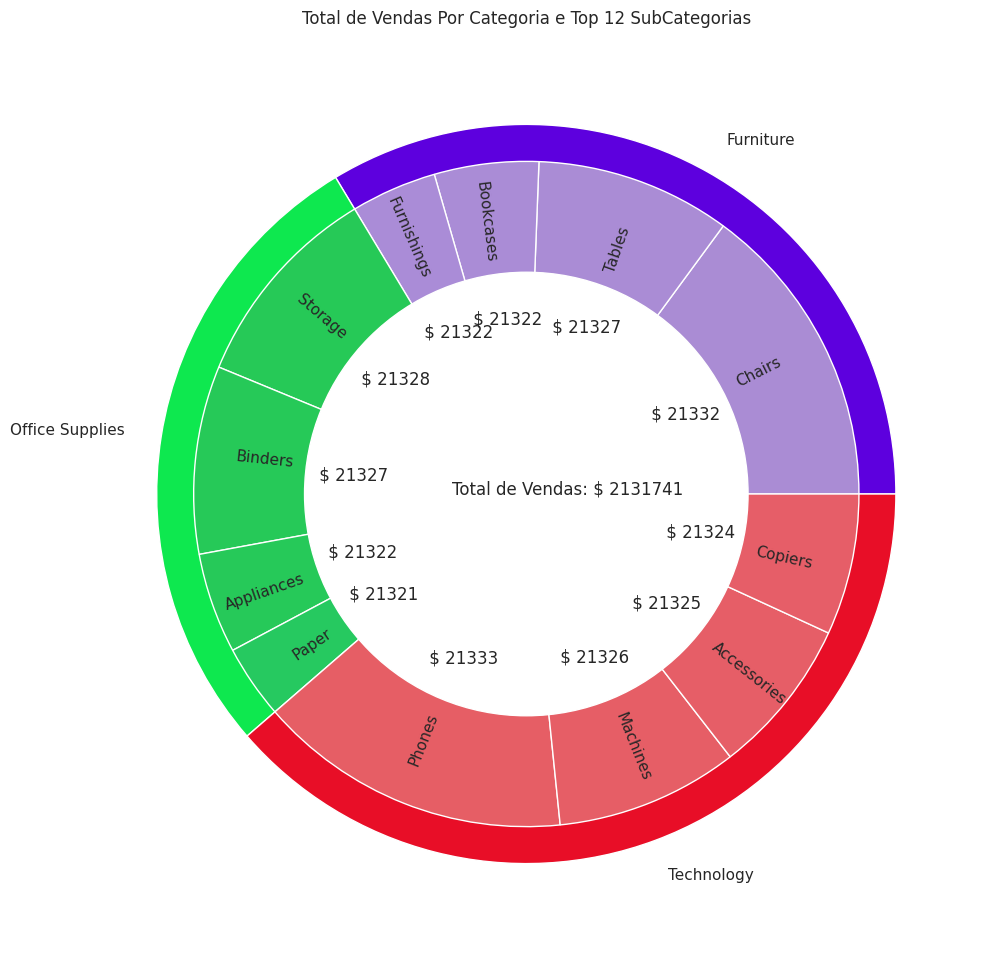

In [116]:
fig, ax = plt.subplots(figsize = (18,12))

# Gráfico das categorias
p1 = ax.pie(df_cat['Valor_Venda'],
            radius = 1,
            labels = df_cat['Categoria'],
            wedgeprops = dict(edgecolor = 'white'),
            colors = cores_categorias)

# Gráfico das subcategorias
p2 = ax.pie(df_cat_subcat['Valor_Venda'],
            radius = 0.9,
            labels = df_cat_subcat['SubCategoria'],
            autopct = autopct_format(df_cat_subcat['Valor_Venda']),
            colors = cores_subcategorias,
            labeldistance = 0.7,
            wedgeprops = dict(edgecolor = 'white'),
            pctdistance = 0.53,
            rotatelabels = True)

# Limpa o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc = 'white')

# Labels e anotações
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_cat_subcat['Valor_Venda']))), xy = (-0.2, 0))
plt.title('Total de Vendas Por Categoria e Top 12 SubCategorias')
plt.show()